# 1. 데이터 가져오기

In [36]:
df = read.csv("Project/pdata/report3_0810.csv")
head(df)

Country,Year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,schooling,alcohol.disorders,suicide.rates,Obesity,Fertility,DALYs.Mental.disorders
Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,3.0,0.7901894,0.5896119,5.77,6.373,2.298615
Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,3.1,0.7708637,0.6046841,6.23,6.180,2.406117
Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,3.2,0.7569276,0.6264676,6.60,5.977,2.539439
Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,3.3,0.7403437,0.6460586,6.87,5.770,2.656310
Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,3.4,0.7241509,0.6583662,7.08,5.562,2.745618
Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,3.5,0.7100469,0.6780369,7.34,5.359,2.852844


# 2. 회귀식 적합

In [37]:
fit<-lm(Life.Ladder ~ Log.GDP.per.capita+Social.support+Healthy.life.expectancy.at.birth+ 
          Freedom.to.make.life.choices +Generosity + Perceptions.of.corruption + schooling + 
          alcohol.disorders +suicide.rates + Obesity + Fertility + DALYs.Mental.disorders, data=df)
summary(fit)


Call:
lm(formula = Life.Ladder ~ Log.GDP.per.capita + Social.support + 
    Healthy.life.expectancy.at.birth + Freedom.to.make.life.choices + 
    Generosity + Perceptions.of.corruption + schooling + alcohol.disorders + 
    suicide.rates + Obesity + Fertility + DALYs.Mental.disorders, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.82695 -0.32994  0.01787  0.35075  1.90655 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -4.471983   0.388705 -11.505  < 2e-16 ***
Log.GDP.per.capita                0.508945   0.028724  17.719  < 2e-16 ***
Social.support                    2.100114   0.160499  13.085  < 2e-16 ***
Healthy.life.expectancy.at.birth  0.041417   0.004912   8.432  < 2e-16 ***
Freedom.to.make.life.choices      1.111826   0.116391   9.553  < 2e-16 ***
Generosity                        0.560342   0.089362   6.270 4.48e-10 ***
Perceptions.of.corruption        -0.313439   0.08803

# 3. 회귀진단 그래프

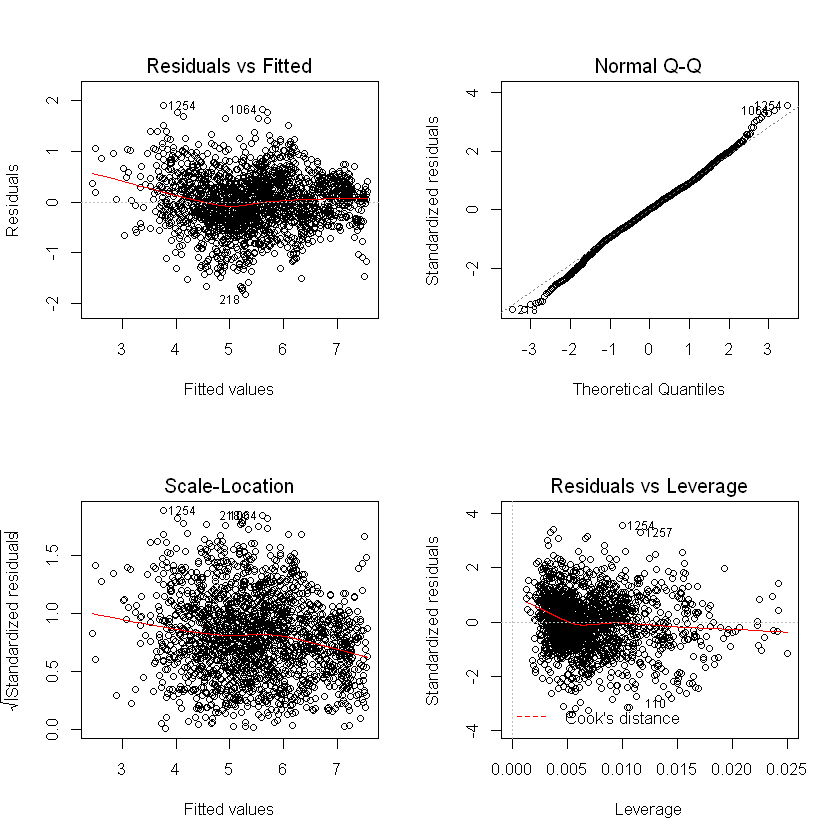

In [38]:
par(mfrow=c(2,2))
plot(fit)  

# 회귀진단 - Car package 이용

In [39]:
#install.packages('car')
library(car)
par(mfrow=c(1,1))

### 1. 정규성
##### qqplot과 density plot 에서는 정규분포를 따르는 것처럼 보이나, Shapiro-Wilk test에서는 정규성 따르지 않다고 나옴. 

[1]  218 1254

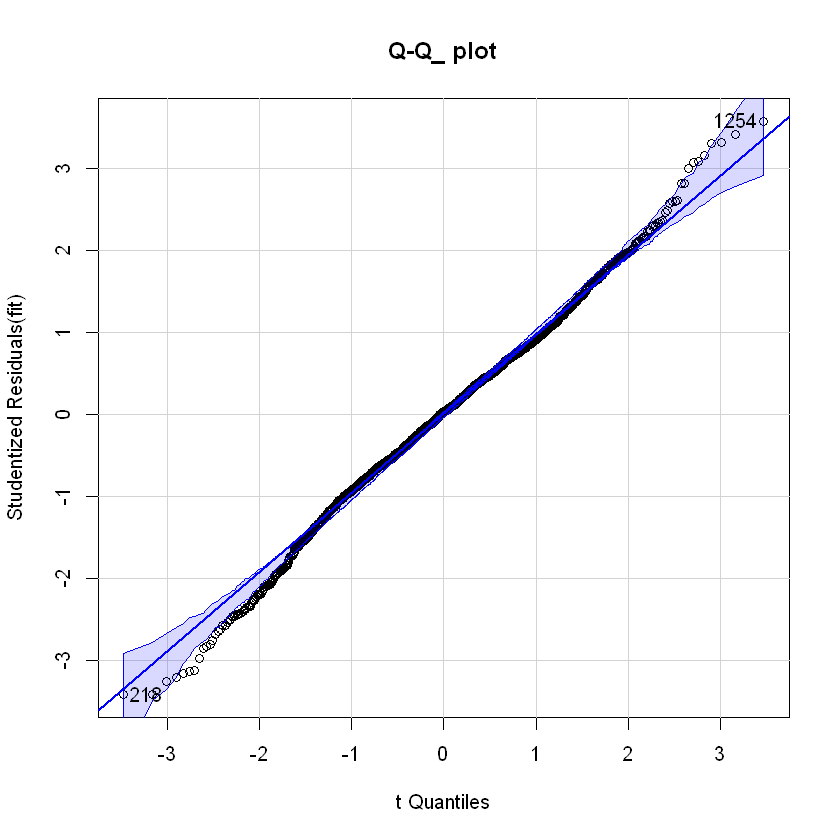

In [40]:
# qqplot 
qqPlot(fit,main="Q-Q_ plot")

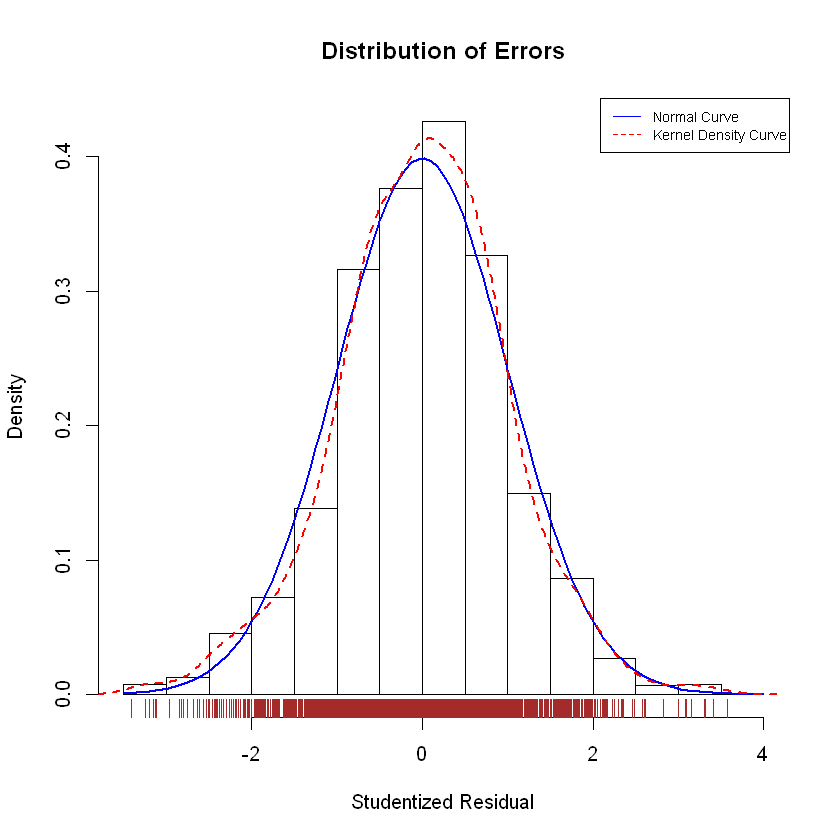

In [41]:
# 오차 분포 확인 
residplot <- function(fit, nbreaks) {
  z <- rstudent(fit)
  hist(z, breaks=nbreaks, freq=FALSE,xlab="Studentized Residual",
       main="Distribution of Errors")
  rug(jitter(z), col="brown")
  curve(dnorm(x, mean=mean(z), sd=sd(z)),add=TRUE, col="blue", lwd=2)
  lines(density(z)$x, density(z)$y,col="red", lwd=2, lty=2)
  legend("topright",legend = c( "Normal Curve", "Kernel Density Curve"),
         lty=1:2, col=c("blue","red"), cex=.7)
}
residplot(fit, 20)

In [42]:
# Shapiro-Wilk test
shapiro.test(rstudent(fit))  # H0:정규분포 따른다. p-value = 3.179e-05 -> H0 기각. 정규분포 따르지 않음


	Shapiro-Wilk normality test

data:  rstudent(fit)
W = 0.99562, p-value = 3.179e-05


### 2. 독립성

In [43]:
library(lmtest) 
dwtest(fit)


	Durbin-Watson test

data:  fit
DW = 0.61578, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


### 3. 선형성
##### partial residual plot

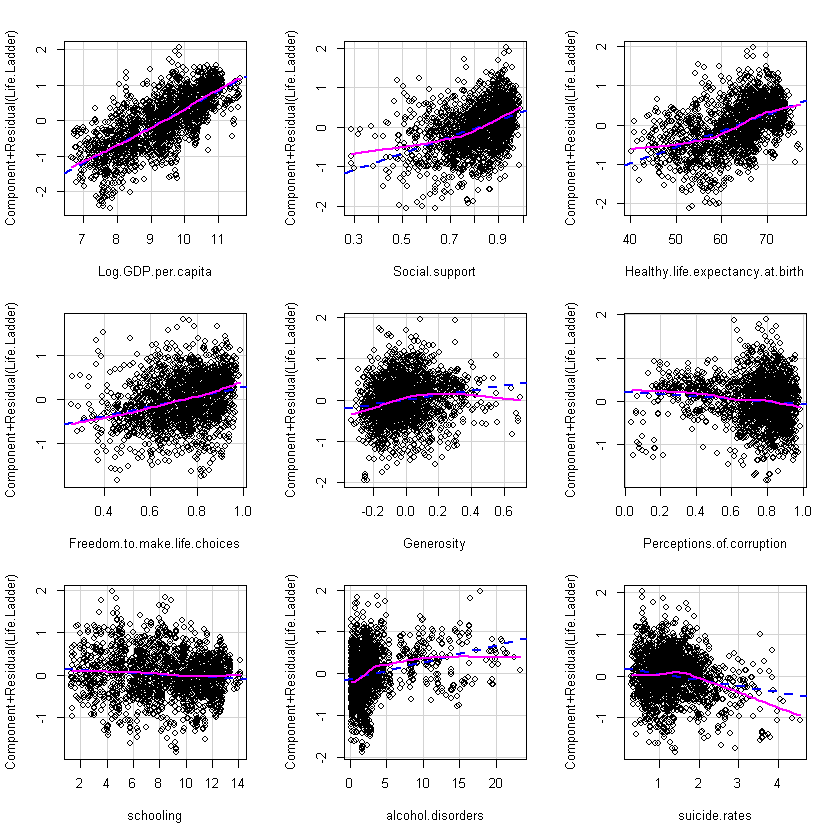

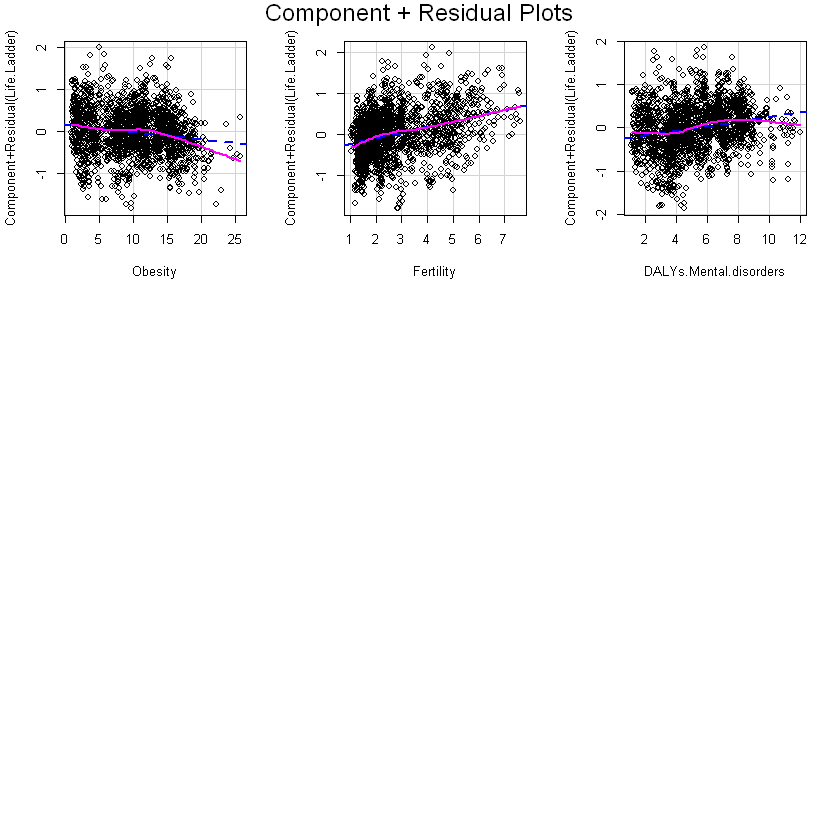

In [44]:
crPlots(fit)  # 선형성 대략적으로 만족하는 것으로 보임

### 4. 등분산성

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 55.23702, Df = 1, p = 1.0684e-13


Suggested power transformation:  1.68861 

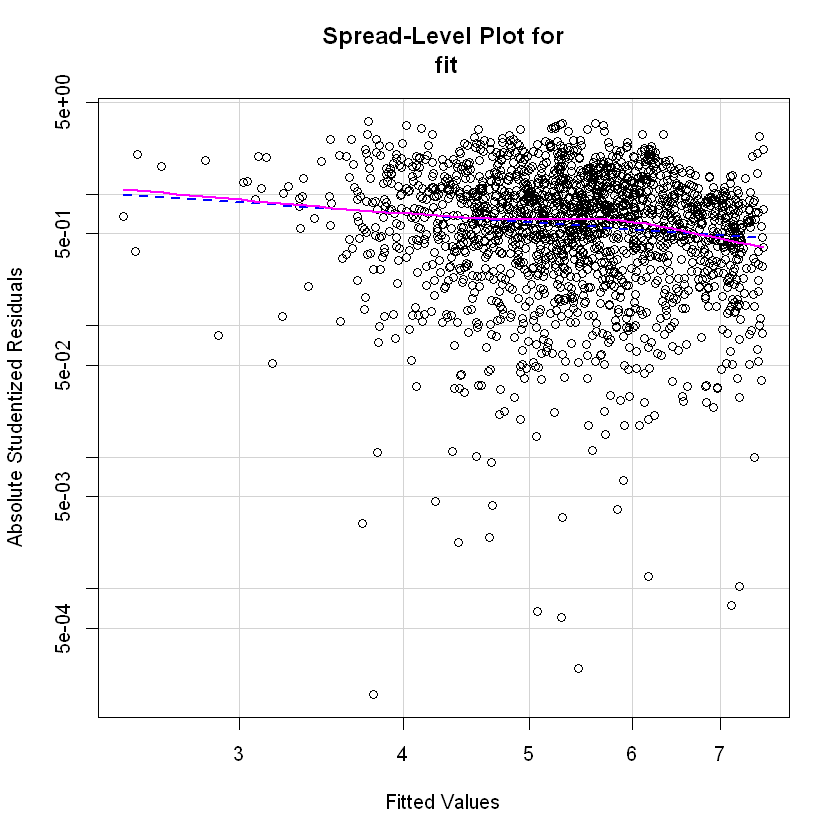

In [45]:
par(mfrow=c(1,1))
ncvTest(fit)  # p = 1.0684e-13 로 유의 -> 등분산성의 가정 위배 
spreadLevelPlot(fit)  # power transforamtion 값 제시 : 1.68861 

## 선형모형 가정에 대한 전반적 검증

In [46]:
#install.packages('gvlma')
library(gvlma)
gvmodel <- gvlma(fit)
summary(gvmodel)
# Global stat의 p값이 0.05 이하이므로 어느 부분이 위배되었는지 평가해야함. 


Call:
lm(formula = Life.Ladder ~ Log.GDP.per.capita + Social.support + 
    Healthy.life.expectancy.at.birth + Freedom.to.make.life.choices + 
    Generosity + Perceptions.of.corruption + schooling + alcohol.disorders + 
    suicide.rates + Obesity + Fertility + DALYs.Mental.disorders, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.82695 -0.32994  0.01787  0.35075  1.90655 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -4.471983   0.388705 -11.505  < 2e-16 ***
Log.GDP.per.capita                0.508945   0.028724  17.719  < 2e-16 ***
Social.support                    2.100114   0.160499  13.085  < 2e-16 ***
Healthy.life.expectancy.at.birth  0.041417   0.004912   8.432  < 2e-16 ***
Freedom.to.make.life.choices      1.111826   0.116391   9.553  < 2e-16 ***
Generosity                        0.560342   0.089362   6.270 4.48e-10 ***
Perceptions.of.corruption        -0.313439   0.08803

## 이상치 테스트
##### 비정상적으로 큰 양수 또는 음수의 잔차를 가짐. 잔차가 양성인 경우 모형이 반응변수를 저평가한 것, 음성인 경우 과대평가한 것. 표준잔차의 2배 이상으로 크거나 -2배 이상으로 작은 값은 이상치.

In [47]:
outlierTest(fit)  # 1548는 이상치
df["1254",]

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
     rstudent unadjusted p-value Bonferroni p
1254 3.573149         0.00036182      0.66901

,Country,Year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,schooling,alcohol.disorders,suicide.rates,Obesity,Fertility,DALYs.Mental.disorders
1254,Pakistan,2007,5.671,8.277,0.479,55,0.396,0.089,0.794,4.4,0.9744702,0.5791493,5.07,4.211,2.603388


## 큰지레점(High leverage points)
##### 예측변수의 이상치. 평균 hat 값의 2~3배 이상 큰 수치를 가지는 관측치는 검사해 봐야 함. 

integer(0)

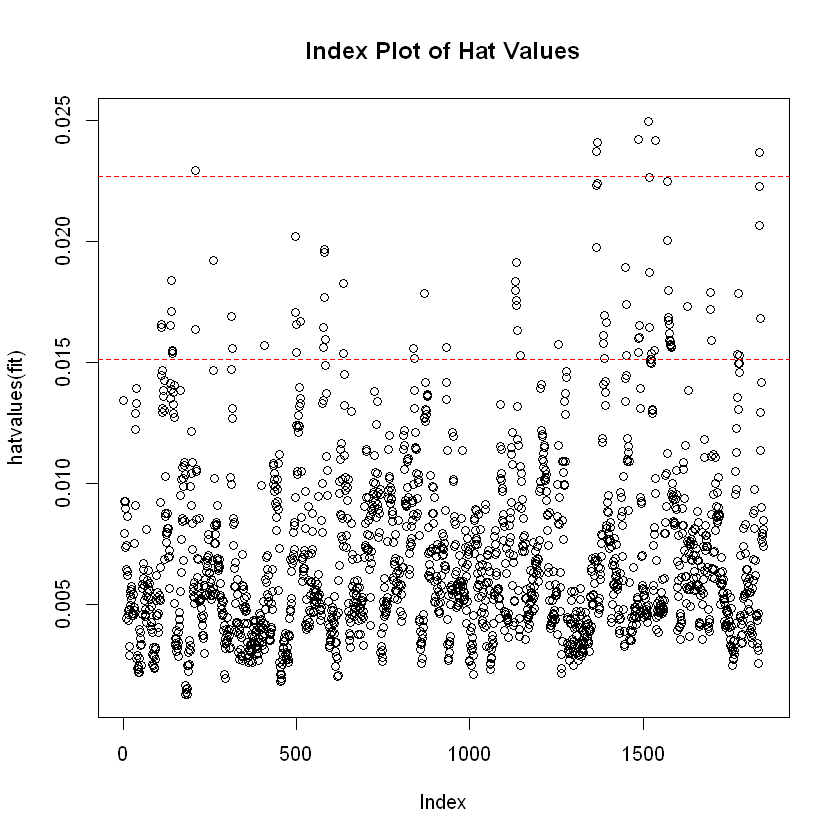

In [48]:
p=length(coefficients(fit))
n=length(fitted(fit))
hatmean = (p+1)/n  # 지레값 평균 

hat.plot=function(fit){
  p=length(coefficients(fit))
  n=length(fitted(fit))
  plot(hatvalues(fit), main="Index Plot of Hat Values")
  abline(h=c(2,3)*hatmean, col="red", lty=2)
  identify(1:n, hatvalues(fit), names(hatvalues(fit)))
}
hat.plot(fit)

In [49]:
# 3배 이상인 개체 -> 왜 영향력이 있는지 데이터를 탐색해봐야 함. 그 후 제거할지 살릴지 판단
df[which(hatvalues(fit)>3*hatmean),]

,Country,Year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,schooling,alcohol.disorders,suicide.rates,Obesity,Fertility,DALYs.Mental.disorders
207,Botswana,2006,4.739,9.492,0.883,46.820,0.824,-0.195,0.723,8.4,1.9745617,0.7584802,3.44,3.066,2.212231
1366,Qatar,2011,6.592,11.553,0.857,67.020,0.905,0.012,0.184,8.7,0.3705490,4.0534673,18.93,2.027,11.634579
1367,Qatar,2012,6.611,11.523,0.838,67.340,0.924,0.162,0.184,9.2,0.3696055,4.1197966,18.89,1.997,11.717980
1486,South Africa,2006,5.084,9.386,0.913,48.020,0.649,-0.084,0.441,9.0,2.4284312,1.3026116,6.04,2.607,1.967351
1516,Sri Lanka,2006,4.345,8.912,0.864,65.780,0.724,0.062,0.838,10.5,3.2013558,4.5457844,6.78,2.278,5.704632
1535,Eswatini,2011,4.867,8.940,0.837,40.808,0.607,-0.067,0.917,5.9,3.3266404,1.4577984,6.90,3.264,1.660441
1835,Zimbabwe,2006,3.826,7.711,0.822,41.580,0.431,-0.076,0.905,6.8,1.2905876,1.3693419,2.65,3.819,1.249994


## 영향 관측치 (influential observation)
##### 관측치를 제거함으로써 모형이 극적으로 달라지게 되는 경우가 있는데 이러한 관측치가 영향관측치 .Cook’s distance 값이 4/(n-k-1)보다 큰 관측치는 영향관측치이다. 이때 n은 샘플 크기이며 k는 예측변수의 수.

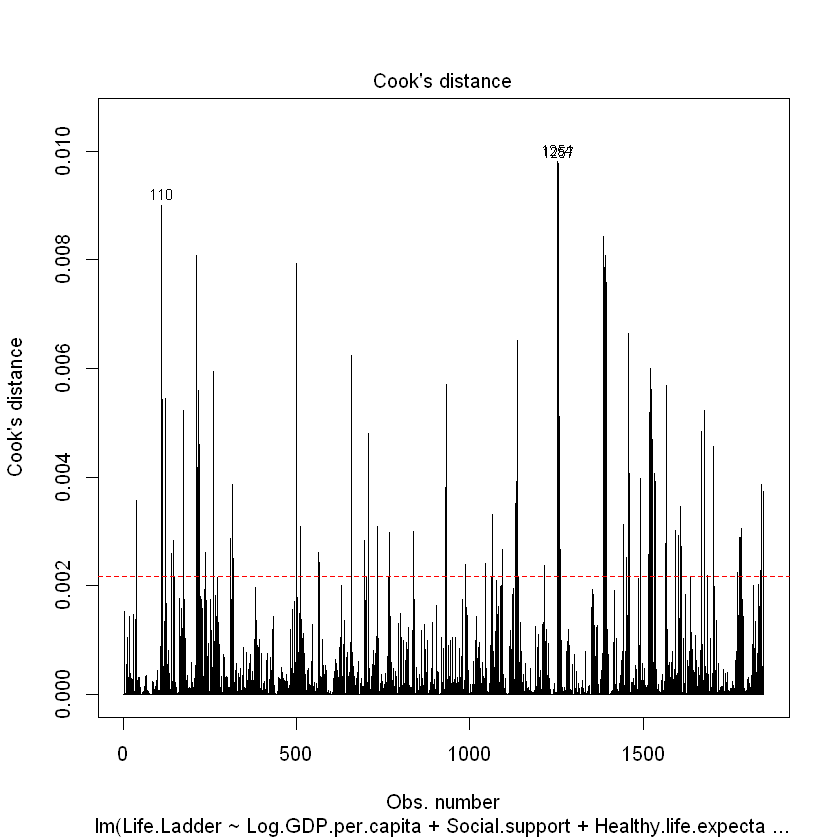

In [50]:
par(mfrow=c(1,1))
cutoff <- 4/(nrow(df)-length(fit$coefficients)-1)
plot(fit, which=4, cook.levels=cutoff)
abline(h=cutoff, lty=2, col="red")

# 빨간선 위 데이터들은 영향 관측치

## Added-Variable plot

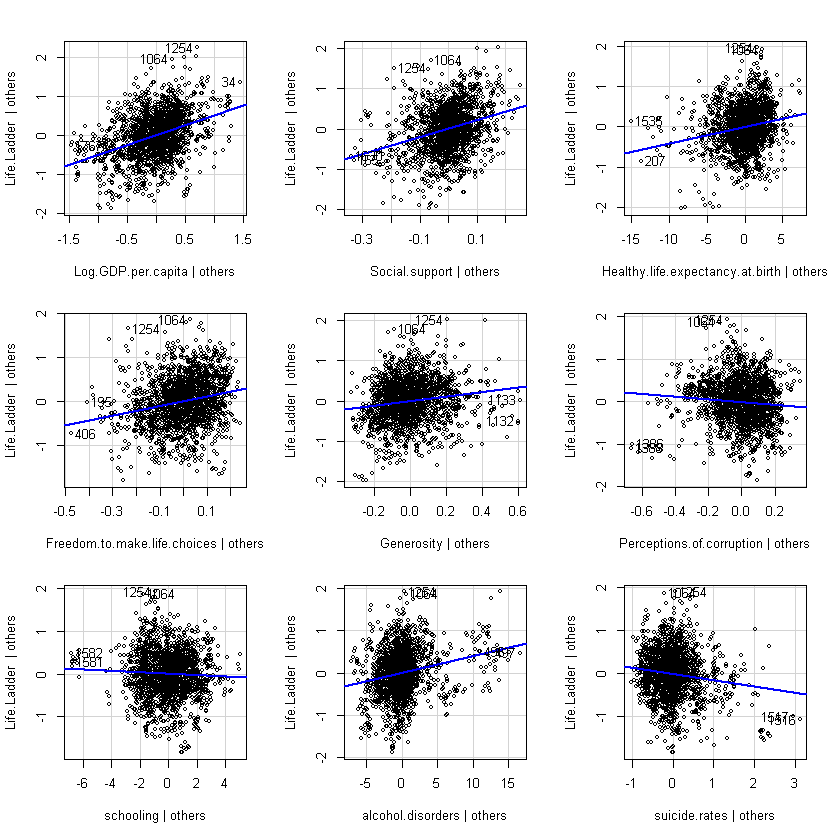

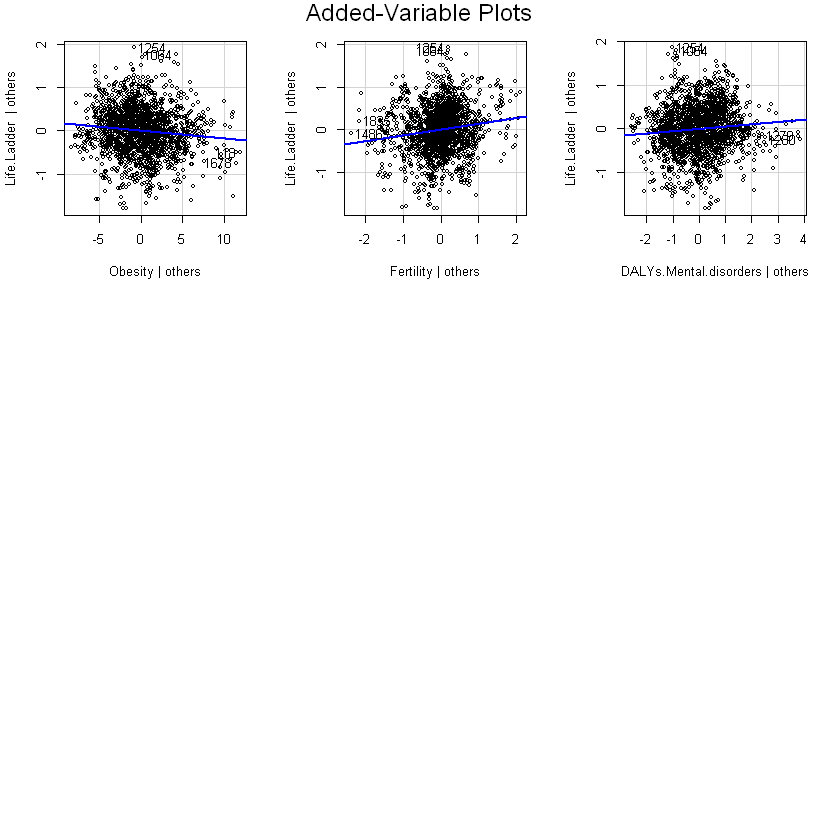

In [51]:
car::avPlots(fit,ask=FALSE)

# 플롯에 나타나는 점들의 기울기는 해당 예측변수에 대한 회귀계수. 계수의 크기를 예측하는 데 중요한 역할을 하는 데이터 점 제시. 
# 한 관측치의 점이 없어질 경우 회귀선에 어떤 영향을 미칠지 생각해볼 수 있음

###### 회귀선에 영향을 줄 것이라고 생각되는 개체 (다른 데이터들과 떨어져 있어서 회귀선을 자기쪽으로 끌어당김) 

In [52]:
a <- c('1064','1254', '1386','1385','1516','1517')
df[a,]

,Country,Year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,schooling,alcohol.disorders,suicide.rates,Obesity,Fertility,DALYs.Mental.disorders
1064,Mexico,2013,7.443,9.832,0.759,67.04,0.739,-0.165,0.615,8.4,3.7067141,1.1066940,15.57,2.270,5.792723
1254,Pakistan,2007,5.671,8.277,0.479,55.00,0.396,0.089,0.794,4.4,0.9744702,0.5791493,5.07,4.211,2.603388
1386,Rwanda,2012,3.333,7.428,0.637,57.44,0.835,-0.012,0.081,3.7,2.8774505,1.0385491,2.12,4.322,3.262123
1385,Rwanda,2011,4.097,7.369,0.570,56.82,0.829,-0.039,0.161,3.8,2.9026064,1.0096520,1.98,4.412,3.112255
1516,Sri Lanka,2006,4.345,8.912,0.864,65.78,0.724,0.062,0.838,10.5,3.2013558,4.5457844,6.78,2.278,5.704632
1517,Sri Lanka,2007,4.415,8.970,0.838,65.86,0.736,0.110,0.847,10.6,2.9091960,4.3598575,7.16,2.275,5.787646


## 이상치, 큰지레점, 영향관측치 한 번에 파악하기

,StudRes,Hat,CookD
218,-3.4146200,0.005126167,0.0045946454
1254,3.5731492,0.009956119,0.0098134103
1257,3.2994722,0.011594386,0.0097707035
1486,0.4349855,0.024221424,0.0003614484
1516,-1.1444354,0.024974312,0.0025801409


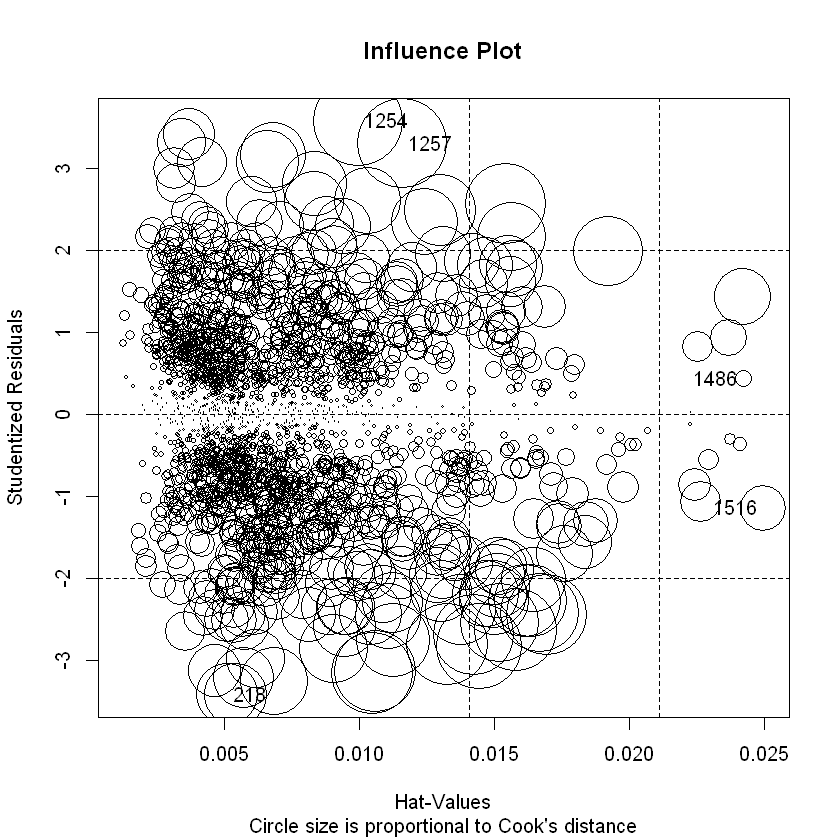

In [53]:
par(mfrow=c(1,1))
car :: influencePlot(fit, main='Influence Plot', 
                     sub = "Circle size is proportional to Cook's distance")
# y축이 표준화잔차이므로 +2배, -2배이상 벌어져 있는 점들이 이상치. 
# x축이 hat값이므로 평균 hat값의 2배이상 되는 개체들이 높은 지레점 -> 이 개체들은 영향력이 있는지 탐지되어야 함
# 원의 크기가 Cook's D 값은 반영 하므로 원의 크기가 큰 개체들이 영향 관측치

## 정규성 만족을 위해 boxcox transfrom 시도 -> 변환 후 정규성뿐만 아니라 다른 가정들도 만족하는 경우가 있음

[1] 1.232323

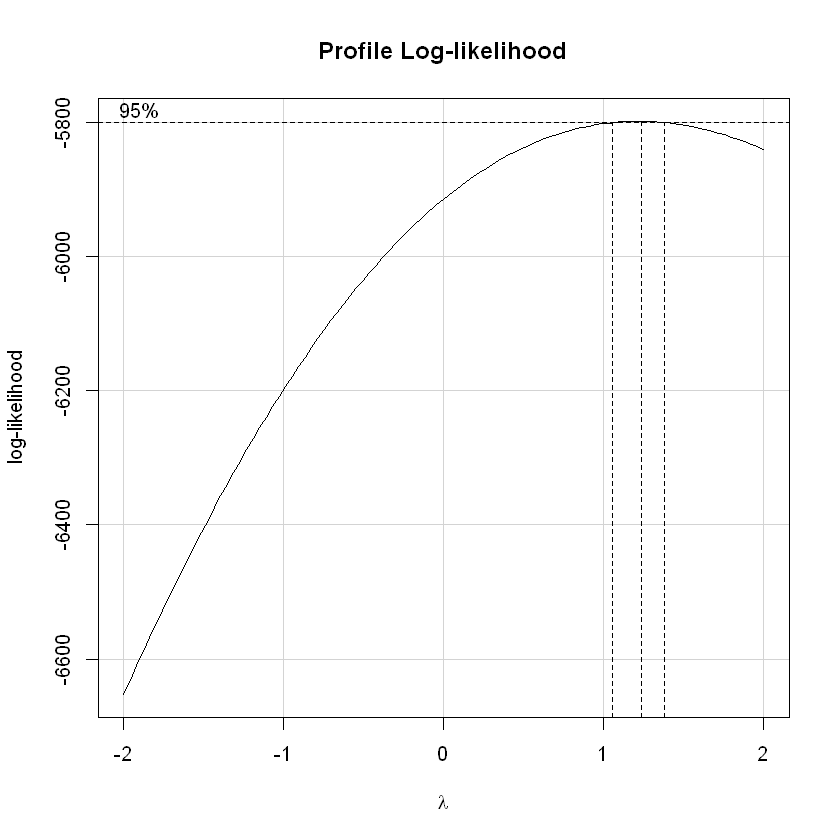

In [54]:
library(car)
bc <- boxCox(fit)
lambda <- bc$x[which.max(bc$y)]  # 최적의 람다 값 찾기(log-likelihood가 최대가 되는 람다값)
lambda    # 1.232323

##### 반응변수 변환 후 회귀식적합

In [55]:
fit2 <- lm(I((Life.Ladder^lambda - 1)/lambda) ~ Log.GDP.per.capita+Social.support+Healthy.life.expectancy.at.birth+ 
     Freedom.to.make.life.choices +Generosity + Perceptions.of.corruption + schooling + 
     alcohol.disorders +suicide.rates + Obesity + Fertility + DALYs.Mental.disorders, data=df)

##### boxcox변환 후 새로 적합된 회귀식(fit2)으로 정규성, 등분산성, 독립성 검정 
##### 결과 : 세 개의 가정 만족 모두 실패! 

In [56]:
# fit2 정규성 테스트
shapiro.test(resid(fit2))  

# 등분산성 검정 
library(lmtest)
bptest(fit2) 

# 독립성 검정
dwtest(fit2) 


	Shapiro-Wilk normality test

data:  resid(fit2)
W = 0.99674, p-value = 0.0005812



	studentized Breusch-Pagan test

data:  fit2
BP = 53.794, df = 12, p-value = 2.974e-07



	Durbin-Watson test

data:  fit2
DW = 0.602, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0
